### Student Information
Name: Kelvin Xavier Munguia Velez

Student ID: 107065424

GitHub ID: xavier2696

---

# Lab 1
## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#imports and setup
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
import nltk
nltk.download('punkt')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import plotly
plotly.tools.set_credentials_file(username='xavier2696', api_key='97cuXMXYTejnMxo9gpIk')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Xavier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Take Home Exercises

In [3]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### Exercise 2

In [4]:
#answer here
#return the first 10 records of the categories 1 and 2 using the query instructions
X.query('(category == [1,2])')[0:10] 

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
23,From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...,1,comp.graphics


In [5]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Exercise 5

In [7]:
# Answer here
#the isnull method will only return true if a value is missing, not a number(nan) or the special keyword None.
#if the value is a string it does not evaluate the content of the string, so it has no way of knowing that the value inside
#the string is NaN, none or if it is an empty string

In [8]:
X_sample = X.sample(n=1000) #random state

### Exercise 6

In [9]:
# Answer here
#the dataframe X did not change because the sample method creates a copy of the dataframe, it does not replace the 
#original data set

### Exercise 8

AxesSubplot(0.125,0.125;0.775x0.755)


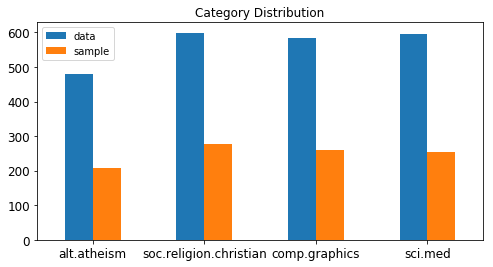

In [10]:
#answer here
sample_counts = X_sample.category_name.value_counts()
actual_counts = X.category_name.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts}, index = categories)

print(combined_data_frame.plot.bar(title = 'Category Distribution', rot = 0, fontsize = 12, figsize = (8,4)))

In [11]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### Exercise 10

In [12]:
# Answer here
array = X_counts[4:5, 0:100].toarray() #obtain the fifth record

#manual complicated way
#iterator = np.nditer(array, flags=['f_index'])
#while not iterator.finished:
    #if iterator[0] == 1:
        #print('word present in record: %s' % count_vect.get_feature_names()[iterator.index])
    #iterator.iternext()

#easy way
#print all the words contained in the sentence from the first 100 words, the second word printed is the one corresponding to the 
#second 1 in the array
for word in count_vect.inverse_transform(array)[0]:
    print('word: %s' % word)

word: 00
word: 01


### Exercise 11

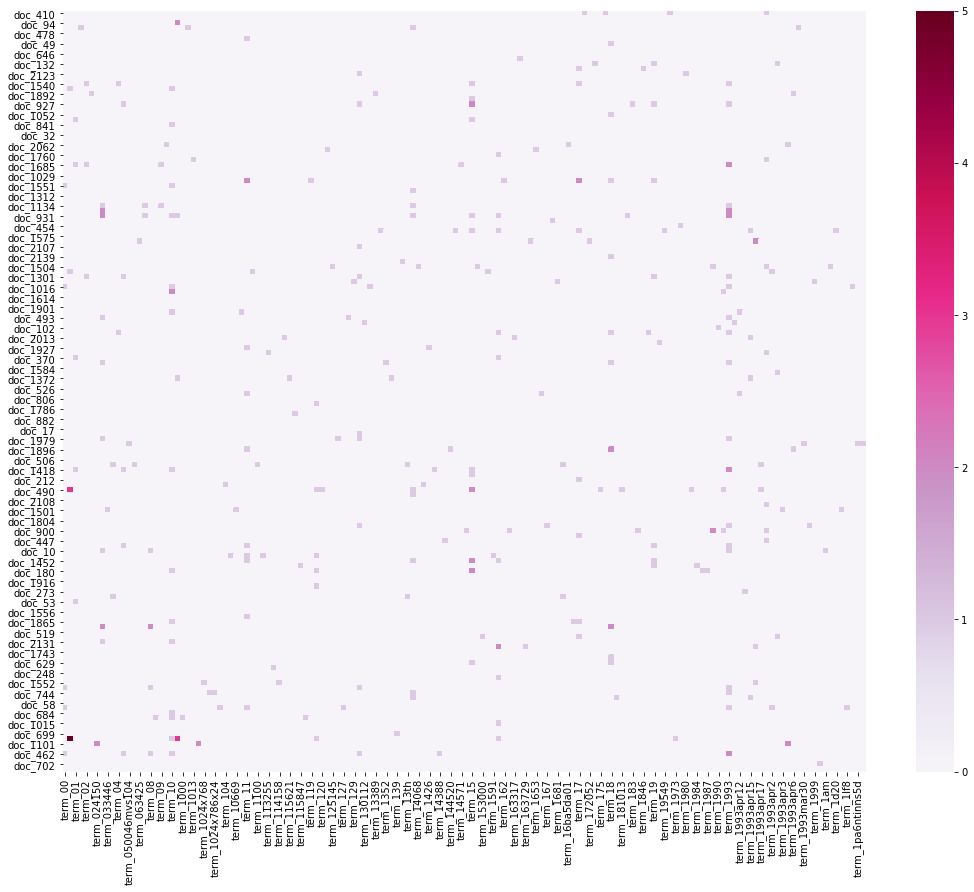

In [13]:
# Answer here
#we can use a sample of the whole documents to create a smaller term-document matrix which we can plot to observe some terms 
#that are more repeated than others
#we can also remove the vmax to be able to show different colors for different values in the term-document matrix and remove the
#number labels inside the heatmap to make it less cluttered
n = 150
sample_X = X.sample(n=n, random_state = 26)
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sample_X.text)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=False)

### Exercise 12

Dimension:
(2257, 3)


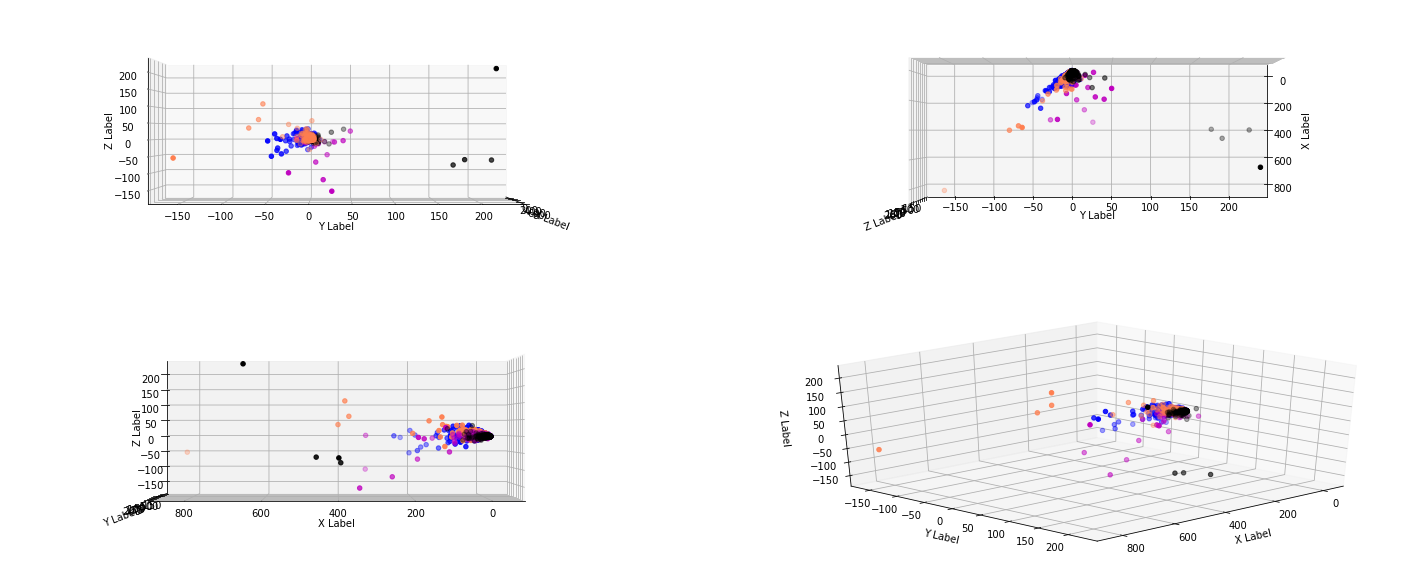

In [14]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print('Dimension:')
print(X_reduced3.shape)
col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax2.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax3.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax4.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(0, 0)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 0)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(0, 90)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label')
ax4.set_ylabel('\nY Label')
ax4.set_zlabel('\nZ Label')
ax4.view_init(30, 45)

plt.show()

Observations:
Data appears to be more sparse along the z and y axes and appears to be more compact along the z and x axes

In [15]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### Exercise 13

In [16]:
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=["term_"+str(i) for i in count_vect.get_feature_names()[0:300]], #plotly is so stupid that if I don't concatenate a string with letters to each feature name the graph will not work
            y=term_frequencies[:300]
    )]

py.iplot(data, filename='Term Frequencies')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xavier2696/0 or inside your plot.ly account where it is named 'Term Frequencies'


### Exercise 14

In [17]:
# Answer here
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
sample_term_frequencies_df = term_frequencies_df.sample(n=100, random_state=26)
sample_data = [go.Bar(
            x=["term_"+str(i) for i in sample_term_frequencies_df['terms']],
            y=sample_term_frequencies_df['counts']
    )]

py.iplot(sample_data, filename='Sample Data Terms')

### Exercise 15

In [18]:
# Answer here
ordered_term_frequencies_df = term_frequencies_df.sort_values(by = 'counts', ascending = False)
ordered_data = [go.Bar(
            x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts']
    )]

py.iplot(ordered_data, filename = 'Ordered Data Terms')

The draw time for this plot will be slow for clients without much RAM.


D:\Documents\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [19]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### Exercise 16

In [20]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


Observation: 
Binarization with category name returns exactly the same result as binarization with category

## Lab Assignment

### Save the data into a python dictionary

In [21]:
#load data into python array
sentiment_data_array = []
with open("sentiment_labelled_sentences_data/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_data_array += [string + '\tamazon' for string in amazon_data.read().split('\n')]
with open("sentiment_labelled_sentences_data/imdb_labelled.txt","r") as imdb_data:
    sentiment_data_array += [string + '\timdb' for string in imdb_data.read().split('\n')]
with open("sentiment_labelled_sentences_data/yelp_labelled.txt","r") as yelp_data:
    sentiment_data_array += [string + '\tyelp' for string in yelp_data.read().split('\n')]

#create dictionary with the array
sentiment_data = dmh.sentiment_data_dictionary(sentiment_data_array)

### Save the data into a pandas dataframe

In [22]:
# create dataframe
sentiment_data_df = pd.DataFrame.from_records(data = {"sentence":sentiment_data['sentences'], "score":sentiment_data['scores'], "source":sentiment_data['sources']})
print(sentiment_data_df[:10])

  score                                           sentence  source
0     0  So there is no way for me to plug it in here i...  amazon
1     1                        Good case, Excellent value.  amazon
2     1                             Great for the jawbone.  amazon
3     0  Tied to charger for conversations lasting more...  amazon
4     1                                  The mic is great.  amazon
5     0  I have to jiggle the plug to get it to line up...  amazon
6     0  If you have several dozen or several hundred c...  amazon
7     1        If you are Razr owner...you must have this!  amazon
8     0                Needless to say, I wasted my money.  amazon
9     0                   What a waste of money and time!.  amazon


### Data Exploration and Data Operation

#### Check for missing values

In [23]:
sentiment_data_df.isnull().apply(lambda x: dmh.check_missing_values(x))

score       The amoung of missing records is: 0
sentence    The amoung of missing records is: 0
source      The amoung of missing records is: 0
dtype: object

There are no missing values in the dataset, the sentiment_data_dictionary method in the helpers file will ignore any rows that contain either a sentence none value or a score none value.

In this case I think it is better to ignore the rows that contain a none value because there is no way to generate a sentence if it is missing and if we try to estimate a 0 or 1 value for the score it will just contaminate the data.

#### Check for duplicated rows

In [24]:
#check if there are duplicated rows and remove them
duplicates = sum(sentiment_data_df.duplicated('sentence'))
print('Number of rows before cleaning: %d' % len(sentiment_data_df))
print('Duplicated rows: %d' % duplicates)
if duplicates > 0:
    sentiment_data_df.drop_duplicates(keep=False, inplace=True)
sentiment_data_df.reset_index(drop=True, inplace=True) #necessary because I discovered that after droping the duplicates the index
#keeps the old original values and when trying to access values with [] the wrong values were being returned
print('Number of rows after cleaning: %d' % len(sentiment_data_df))

Number of rows before cleaning: 3000
Duplicated rows: 17
Number of rows after cleaning: 2966


#### Sampling

In [25]:
#sampling
n = 500
sentiment_data_sample = sentiment_data_df.sample(n=n, random_state=26)

#### Bar Graph Visualization

AxesSubplot(0.125,0.125;0.775x0.755)


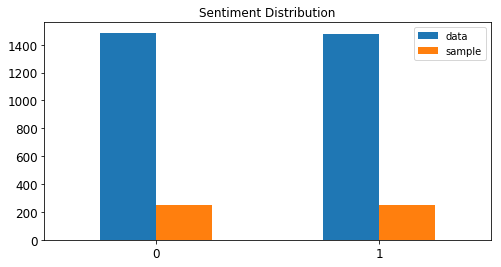

In [26]:
#show the sampling and actual data counts in a bar graph
sample_counts = sentiment_data_sample.score.value_counts()
actual_counts = sentiment_data_df.score.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts})

print(combined_data_frame.plot.bar(title = 'Sentiment Distribution', rot = 0, fontsize = 12, figsize = (8,4), tick_label = ['negative', 'positive']))

#### Pie Chart Visualization

In [27]:
#new data visualization
#pie  chart
print(sentiment_data_df.source.value_counts())
trace = go.Pie(labels=sentiment_data_df.source.value_counts().index, values=sentiment_data_df.source.value_counts())

py.iplot([trace], filename='basic_pie_chart')

imdb      994
yelp      992
amazon    980
Name: source, dtype: int64


#### Scatter Visualization

In [28]:
#new data visualization
#show the relation between the word count in each sentence and what sentiment it is attached to
sentiment_data_sample_2 = sentiment_data_df.sample(n = 100)
x_axis_array = ["sentence_" + str(index) for index in sentiment_data_sample_2.index]
word_count_trace = go.Scatter(
    x = x_axis_array,
    y = [len(sentence.split(' ')) for sentence in sentiment_data_sample_2.sentence],
    mode = 'lines+markers',
    name = 'Sentence Word Count'
)
         
word_sentiment_trace = go.Scatter(
    x = x_axis_array,
    y = [score for score in sentiment_data_sample_2.score],
    mode = 'lines+markers',
    name = 'Sentence Score'
)
         
scatter_plot = [word_count_trace, word_sentiment_trace]

positive_sentences_array = [len(row.sentence.split(' ')) for index, row in sentiment_data_sample_2.iterrows() if row.score == '1']
print('Average word count in each positive sentence: ', sum(positive_sentences_array)/len(positive_sentences_array))

negative_sentences_array = [len(row.sentence.split(' ')) for index, row in sentiment_data_sample_2.iterrows() if row.score == '0']
print('Average word count in each negative sentence: ', sum(negative_sentences_array)/len(negative_sentences_array))

py.iplot(scatter_plot, filename='Scatter Plot')

Average word count in each positive sentence:  10.844444444444445
Average word count in each negative sentence:  13.545454545454545


After running the cell above various times I can conclude there is no visible relation between the number of words in a sentence and it's score(positive or negative).

#### Feature Creation

Data frame with unigrams:

In [29]:
sentiment_data_df['unigrams'] = sentiment_data_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

#### Feature Subset Selection

Document-Term matrix:

In [30]:
count_vect = CountVectorizer()
frequency_counts = count_vect.fit_transform(sentiment_data_df.sentence)
print("Document Term Matrix Size:", frequency_counts.shape)

Document Term Matrix Size: (2966, 5157)


#### Heatmap visualization

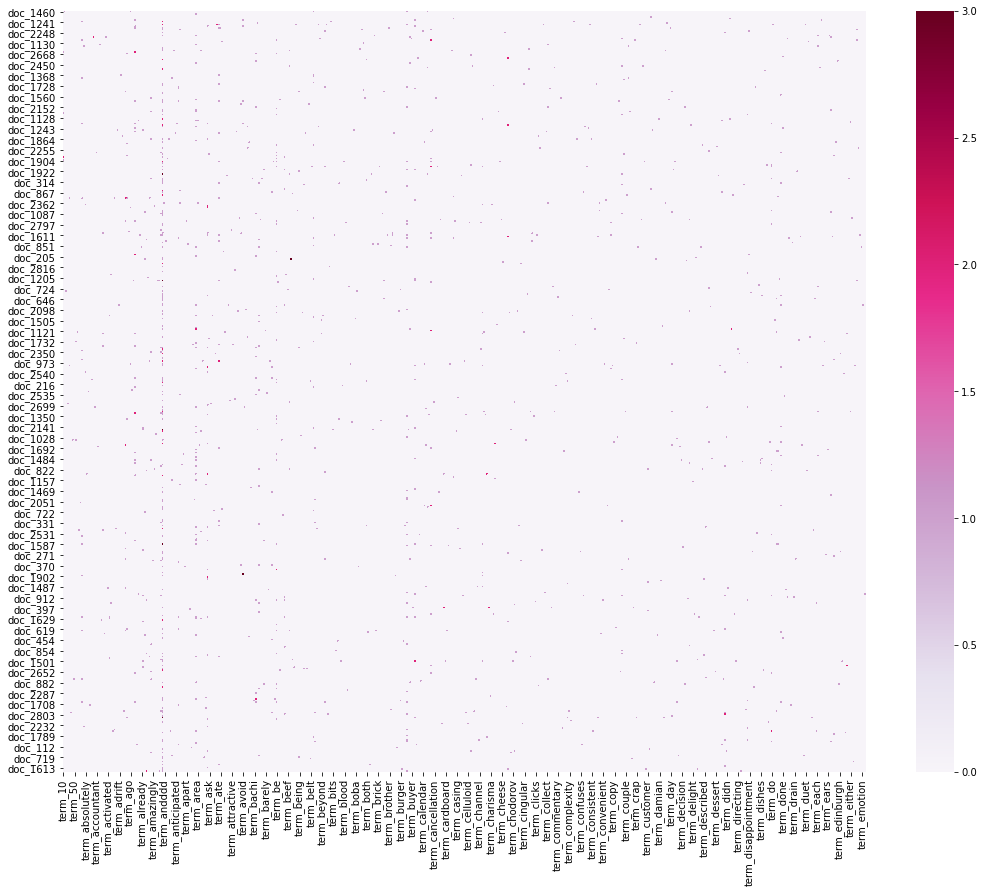

In [31]:
#heaptmap visualization
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sentiment_data_sample.sentence)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]
plot_y = ["doc_"+ str(i) for i in list(sentiment_data_sample.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=False)

#### Dimensionality Reduction

PCA with 2 components along with its scatter plot:

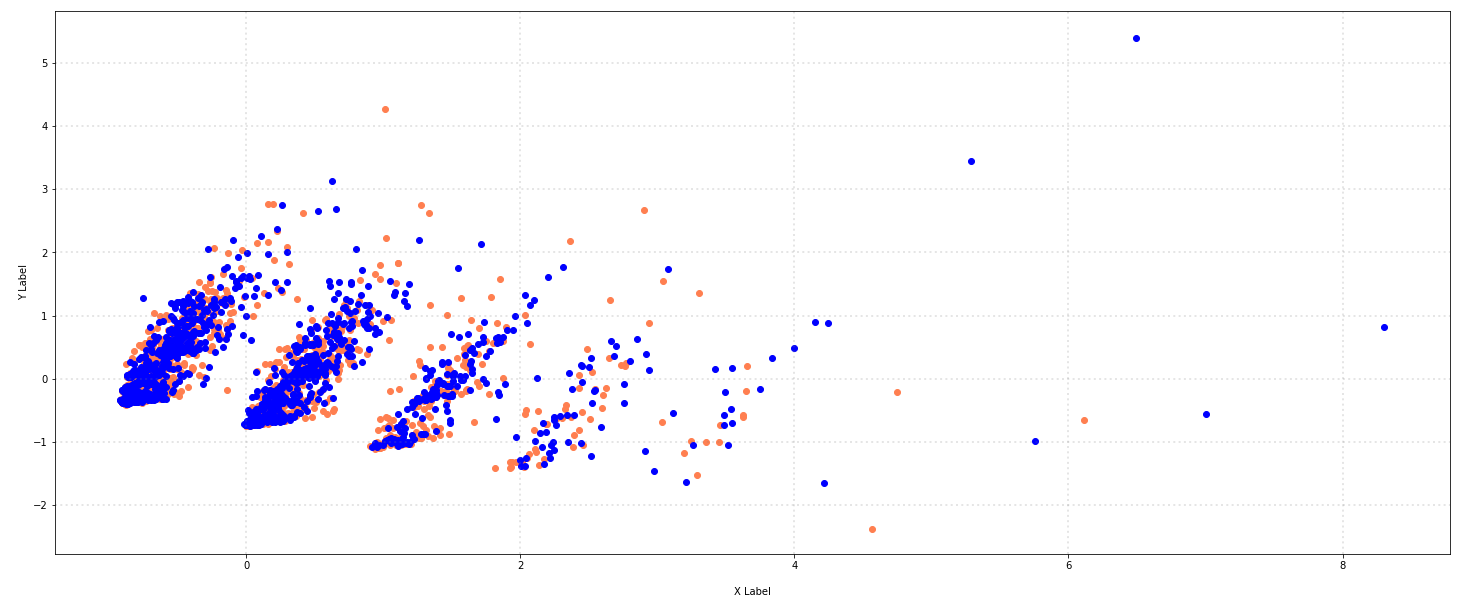

In [32]:
#2 dimension PCA
colors = ['coral', 'blue']
scores = ['0','1']

sentiment_data_reduced2 = PCA(n_components = 2).fit_transform(frequency_counts.toarray())

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced2[sentiment_data_df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

PCA with 3 components along with its scatter plot:

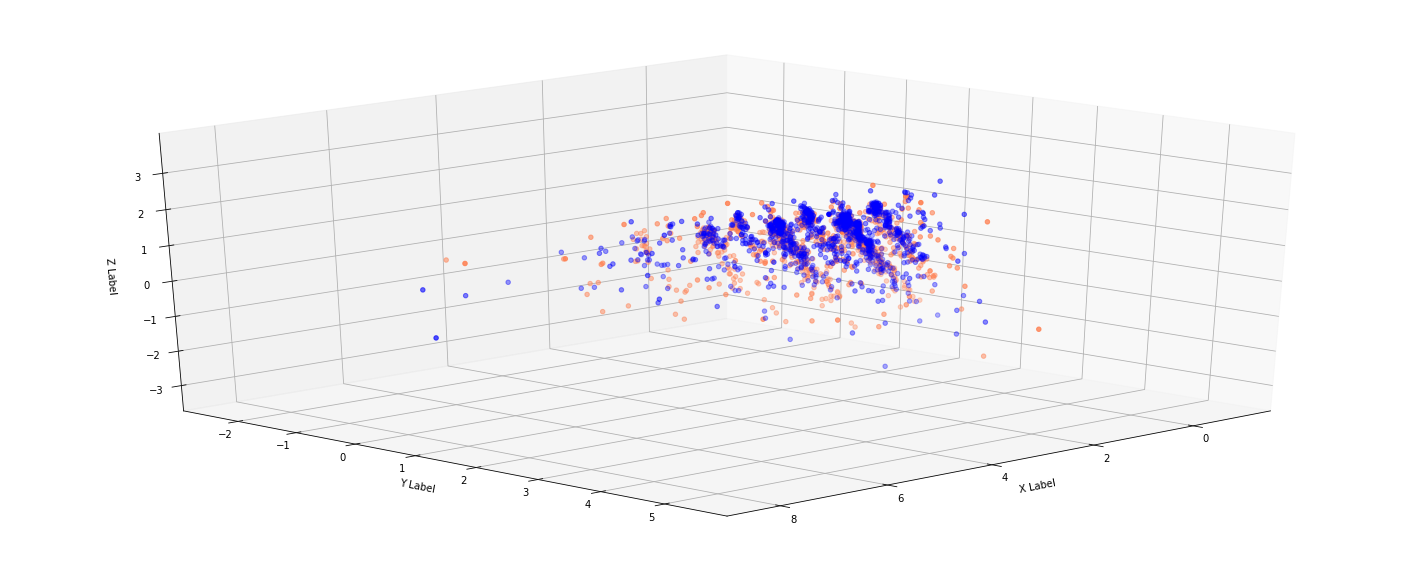

In [33]:
#3 dimension PCA
sentiment_data_reduced3 = PCA(n_components = 3).fit_transform(frequency_counts.toarray())
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(1,1,1, projection='3d')

for c, score in zip(colors, scores):
    xs = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[0]
    ys = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[1]
    zs = sentiment_data_reduced3[sentiment_data_df['score'] == score].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(25, 45)

plt.show()

#### Attribute Transformation/Aggregation

Array that contains the sum of the term frequencies for each word and showing a bar graph visualization:

In [34]:
#create a term frequencies array
term_frequencies = np.asarray(frequency_counts.sum(axis=0))[0]

#term frequencies visualization
data = [go.Bar(
            x=["term_"+str(i) for i in count_vect.get_feature_names()],
            y=term_frequencies
    )]

py.iplot(data, filename='Term Frequencies')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xavier2696/0 or inside your plot.ly account where it is named 'Term Frequencies'


Descending order term frenquencies bar graph visualization: 

In [35]:
#ordered term frequencies visualization
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
ordered_term_frequencies_df = term_frequencies_df.sort_values(by = 'counts', ascending = False)
ordered_data = [go.Bar(
            x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts']
    )]

py.iplot(ordered_data, filename = 'Ordered Data Terms')

#### Binarization

I will appy binarization to the source parameter because it does not make sense to apply it to the score which only has 2 possible values.

In [36]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(sentiment_data_df.source)
sentiment_data_df['bin_source'] = mlb.transform(sentiment_data_df['source']).tolist()
sentiment_data_df[0:9]
#first 10 rows

,score,sentence,source,unigrams,bin_source
0,0,So there is no way for me to plug it in here i...,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,1,"Good case, Excellent value.",amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,1,Great for the jawbone.,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,0,Tied to charger for conversations lasting more...,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,1,The mic is great.,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,0,I have to jiggle the plug to get it to line up...,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,0,If you have several dozen or several hundred c...,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,1,If you are Razr owner...you must have this!,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,0,"Needless to say, I wasted my money.",amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


Last 10 rows:

In [37]:
sentiment_data_df[-9::]

,score,sentence,source,unigrams,bin_source
2957,0,Spend your money and time some place else.,yelp,"[Spend, your, money, and, time, some, place, e...","[0, 0, 1]"
2958,0,A lady at the table next to us found a live gr...,yelp,"[A, lady, at, the, table, next, to, us, found,...","[0, 0, 1]"
2959,0,the presentation of the food was awful.,yelp,"[the, presentation, of, the, food, was, awful, .]","[0, 0, 1]"
2960,0,I can't tell you how disappointed I was.,yelp,"[I, ca, n't, tell, you, how, disappointed, I, ...","[0, 0, 1]"
2961,0,I think food should have flavor and texture an...,yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2962,0,Appetite instantly gone.,yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2963,0,Overall I was not impressed and would not go b...,yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2964,0,"The whole experience was underwhelming, and I ...",yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"
2965,0,"Then, as if I hadn't wasted enough of my life ...",yelp,"[Then, ,, as, if, I, had, n't, wasted, enough,...","[0, 0, 1]"


### TF-IDF Matrix

In [38]:
#TF-IDF
tf_idf_vect = TfidfVectorizer()
tf_idf_counts = tf_idf_vect.fit_transform(sentiment_data_df.sentence)
print('First 10 Feature Names:', tf_idf_vect.get_feature_names()[0:10])
print('TF-IDF Matrix Size:', tf_idf_counts.shape)

First 10 Feature Names: ['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
TF-IDF Matrix Size: (2966, 5157)


#### TF IDF vs Term Frequency comparison visualization

In [39]:
#visualize the 20 terms with the highest values in the TF-IDF Matrix and compare it with the highest values in the 
#Count Frequency Matrix
n = 20
term_tf_idf = np.asarray(tf_idf_counts.sum(axis=0))[0]
term_tf_idf_df = pd.DataFrame({'terms': tf_idf_vect.get_feature_names(), 
                                            'counts': term_tf_idf})
ordered_term_tf_idf_df = term_tf_idf_df.sort_values(by = 'counts', ascending = False)

ordered_tf_idf_data_sample = go.Bar(
            x=["term_"+str(i) for i in ordered_term_tf_idf_df['terms']][:n],
            y=ordered_term_tf_idf_df['counts'][:n],
            name = "TF-IDF"
    )

ordered_counts_data_sample = go.Bar(
            x=["term_"+str(i) for i in ordered_term_frequencies_df['terms'][:n]],
            y=ordered_term_frequencies_df['counts'][:n],
            name = "Word Counts"
    )

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('TF-IDF', 'Word Counts'))

fig.append_trace(ordered_tf_idf_data_sample, 1, 1)
fig.append_trace(ordered_counts_data_sample, 1, 2)

py.iplot(fig, filename = 'TF-IDF Ordered Data Terms vs Counts Ordered Data Terms')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### Distance Similarity

According to the textbook the cosine similarity is normally used when comparing documents because of the sparsity of the document term matrix. I'll compare sentences with the cosine similarity ,pearson's correlation coefficient and extended jaccard coefficient.

I'll show the results of comparing 5 random sentences with the same sentiment, I'm comparing sentences with the same sentiment to increase the possibility of them having words in common.

In [40]:
#distance similarity
for i in range(0,5):
    #show cosine similarity and pearson's correlation coefficient of 2 random documents with negative sentiment (score == 0)
    r_negative_sentences = sentiment_data_df[sentiment_data_df['score'] == '0'].sample(n = 2)
    print('Sentences:')
    for sentence in r_negative_sentences.sentence:
        print('-%s' % sentence)
    index1 = r_negative_sentences.index[0]
    index2 = r_negative_sentences.index[1]
    
    #obtain the rows in the count frequency matrix corresponding to those indexes
    count_row1 = frequency_counts[index1:index1+1]
    count_row2 = frequency_counts[index2:index2+1]

    #obtain the rows in the TF-IDF matrix corresponding to those indexes
    tf_idf_row1 = tf_idf_counts[index1:index1+1]
    tf_idf_row2 = tf_idf_counts[index2:index2+1]

    #cosine similarity
    print("Cosine Similarity using term count:",cosine_similarity(count_row1, count_row2)[0][0])
    print("Cosine Similarity using TF-IDF:",cosine_similarity(tf_idf_row1, tf_idf_row2)[0][0])
    #Pearson's correlation coefficient
    print("Pearson's correlation coefficient using term count:",pearsonr(count_row1.toarray().ravel(),count_row2.toarray().ravel())[0])
    print("Pearson's correlation coefficient using TF-IDF:",pearsonr(tf_idf_row1.toarray().ravel(),tf_idf_row2.toarray().ravel())[0])
    #Extended Jaccard coefficient
    print("Extended Jaccard Coefficient using term count:", dmh.extended_jaccard_coefficient(count_row1.toarray().ravel(), count_row2.toarray().ravel()))
    print("Extended Jaccard Coefficient using TF-IDF:", dmh.extended_jaccard_coefficient(tf_idf_row1.toarray().ravel(), tf_idf_row2.toarray().ravel()))
    print("\n")
    

Sentences:
-Not good enough for the price.
-Not much seafood and like 5 strings of pasta at the bottom.
Cosine Similarity using term count: 0.2461829819586655
Cosine Similarity using TF-IDF: 0.08157807247498453
Pearson's correlation coefficient using term count: 0.24501150787055587
Pearson's correlation coefficient using TF-IDF: 0.08033461106066427
Extended Jaccard Coefficient using term count: 0.13333333333333333
Extended Jaccard Coefficient using TF-IDF: 0.042523530045462735


Sentences:
-The ripped banana was not only ripped, but petrified and tasteless.
-One of the worst shows of all time.  
Cosine Similarity using term count: 0.08770580193070293
Cosine Similarity using TF-IDF: 0.011237438299078379
Pearson's correlation coefficient using term count: 0.08634066977796083
Pearson's correlation coefficient using TF-IDF: 0.009992134720296074
Extended Jaccard Coefficient using term count: 0.045454545454545456
Extended Jaccard Coefficient using TF-IDF: 0.005650467539708399


Sentences:
-W

For most executions the different similarities will be zero(or close to zero) because there are very few words in common between the sentences, even in the sentences that have the same sentiment (either positive or negative).

If we calculate the different similarity coefficients of 2 sentences we know have at least one word in common we can observe a non zero value for both the term count vector and the Tf-IDF vector.

In [41]:
#known negative sentence indexes with common words
index1 = 1455
index2 = 1178
print('Sentences:')
print('-%s' % sentiment_data_df.iloc[index1].sentence)
print('-%s' % sentiment_data_df.iloc[index2].sentence)
#obtain the rows in the count frequency matrix corresponding to those indexes
count_row1 = frequency_counts[index1:index1+1]
count_row2 = frequency_counts[index2:index2+1]

#obtain the rows in the TF-IDF matrix corresponding to those indexes
tf_idf_row1 = tf_idf_counts[index1:index1+1]
tf_idf_row2 = tf_idf_counts[index2:index2+1]

#similarities
print("Cosine Similarity of term count:",cosine_similarity(count_row1, count_row2)[0][0])
print("Cosine Similarity of TF-IDF:",cosine_similarity(tf_idf_row1, tf_idf_row2)[0][0])
print("Pearson's correlation coefficient using term count:",pearsonr(count_row1.toarray().ravel(),count_row2.toarray().ravel())[0])
print("Pearson's correlation coefficient using TD-IDF:",pearsonr(tf_idf_row1.toarray().ravel(),tf_idf_row2.toarray().ravel())[0])
print("Extended Jaccard Coefficient using term count:", dmh.extended_jaccard_coefficient(count_row1.toarray().ravel(), count_row2.toarray().ravel()))
print("Extended Jaccard Coefficient using TF-IDF:", dmh.extended_jaccard_coefficient(tf_idf_row1.toarray().ravel(), tf_idf_row2.toarray().ravel()))

Sentences:
-Hackneyed writing, certainly, but made even worse by the bad directing.  
-This is definitely one of the bad ones.  
Cosine Similarity of term count: 0.21320071635561041
Cosine Similarity of TF-IDF: 0.1047892705186485
Pearson's correlation coefficient using term count: 0.21177179388237666
Pearson's correlation coefficient using TD-IDF: 0.1033777541942133
Extended Jaccard Coefficient using term count: 0.11764705882352941
Extended Jaccard Coefficient using TF-IDF: 0.05529161949569872


For every similarity measure used we can observe the similarity of the vectors using the TF-IDF counts is always lower to the similarity of the vectors using the actual word counts

### Naive Bayes Classifiers

In [42]:
#Naive Bayes classifiers
#term frequency
mnb_term_frequency = MultinomialNB()
mnb_term_frequency.fit(frequency_counts, sentiment_data_df['score'].values)

#TF-IDF
mnb_tf_idf = MultinomialNB()
mnb_tf_idf.fit(tf_idf_counts, sentiment_data_df['score'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Accuracy Testing

In [43]:
#testing the accuracy
#test with a single random sentence from the data set
r_sentence = sentiment_data_df.sample(n = 1)
print('Sentence:',r_sentence.iloc[0].sentence,'\nReal Score:', r_sentence.iloc[0].score)
r_sentence_index = r_sentence.index[0]
print('Term Frequency MNB Prediction: ', mnb_term_frequency.predict(frequency_counts[r_sentence_index:r_sentence_index+1])[0])
print('TF-IDF MNB Prediction: ', mnb_tf_idf.predict(tf_idf_counts[r_sentence_index:r_sentence_index+1])[0])

Sentence: I had always known that Errol Flynn was a brilliant actor as he was my dads favourite actor, and I grew up watching his films as a child.   
Real Score: 1
Term Frequency MNB Prediction:  1
TF-IDF MNB Prediction:  1


In [44]:
#obtain the accuracy of both models comparing the predicted values with the actual scores of all the sentences in the data set
total_sentences = len(sentiment_data_df)
tf_correct_prediction = 0
tf_idf_correct_prediction = 0
for index, row in sentiment_data_df.iterrows():

    tf_prediction = mnb_term_frequency.predict(frequency_counts[index:index+1])[0]
    if row.score == tf_prediction:
        tf_correct_prediction+=1
    
    tf_idf_prediction = mnb_tf_idf.predict(tf_idf_counts[index:index+1])[0]
    if row.score == tf_idf_prediction:
        tf_idf_correct_prediction+=1
    
print('Term Frequency MNB Prediction Accuracy: %.2f%%' % ((tf_correct_prediction/total_sentences)*100))
print('TF-IDF MNB Prediction Accuracy: %.2f%%' % ((tf_idf_correct_prediction/total_sentences)*100))


Term Frequency MNB Prediction Accuracy: 94.50%
TF-IDF MNB Prediction Accuracy: 95.28%


In [45]:
#testing with a sentences that are not in the dataset
negative_sentence = "the worst pizza I have ever eaten"
n_word_freq = count_vect.transform([negative_sentence]).toarray()
n_word_tf_idf = tf_idf_vect.transform([negative_sentence]).toarray()
print('Term Frequency MNB Prediction for negative sentence: ', mnb_term_frequency.predict(n_word_freq[0:1])[0])
print('TF-IDF MNB Prediction for negative sentence: ', mnb_tf_idf.predict(n_word_tf_idf[0:1])[0])

positive_sentence = "the most delicious pizza I have tried"
p_word_freq = count_vect.transform([positive_sentence]).toarray()
p_word_tf_idf = tf_idf_vect.transform([positive_sentence]).toarray()
print('Term Frequency MNB Prediction for positive sentence: ', mnb_term_frequency.predict(p_word_freq[0:1])[0])
print('TF-IDF MNB Prediction for positive sentence: ', mnb_tf_idf.predict(p_word_tf_idf[0:1])[0])

Term Frequency MNB Prediction for negative sentence:  0
TF-IDF MNB Prediction for negative sentence:  0
Term Frequency MNB Prediction for positive sentence:  1
TF-IDF MNB Prediction for positive sentence:  1
